All work herein is solely mine. Parter: Mansour Sharif

## Setup for Homework 5

In [18]:
# Import packages

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import rand_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Matplotlib settings & rng object

rand_state_const = 48
rng = np.random.default_rng(rand_state_const)

%matplotlib inline

SMALL_SIZE = 18
MEDIUM_SIZE = 18
BIGGER_SIZE = 22
CHONK_SIZE = 32
font = {'family' : 'DIN Condensed',
        'weight' : 'bold',
        'size'   : SMALL_SIZE}
plt.rc('font', **font)
plt.rc('axes', titlesize=BIGGER_SIZE, labelsize=MEDIUM_SIZE) # facecolor="xkcd:light grey"
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=CHONK_SIZE, facecolor="xkcd:white", edgecolor="xkcd:black") #  powder blue

In [20]:
# Import data

df = pd.read_csv('ionosphere.data', header=None)

X = df.copy().iloc[:, :-1]
Y = df.copy().iloc[:, -1]

## Problem 1

### 1.1: Briefly describe this data set–what is its purpose? How should it be used? What are the kinds of data it’s using?

This data set comes from JHU's Space Physics Laboratory and consists of 34 fields of exclusively numerical and continuous radar data intended to classify the data as "good" or "bad", according to the 34 aforementioned features.


### 1.2.a) How many entries are in the data set?

There are 351 entries in the data set.

In [21]:
df.shape[0]

351

### 1.2.b) How many unknown or missing data are in the data set?

There are 0 missing values in the data set.

In [22]:
df.isnull().sum().sum()

0

## Problem 2

As a note, we will be employing an accuracy measure called Rand Score to determine how well various methods perform clustering simply because an accuracy test like SMC assumes we know the labels generated by the clustering; Rand Score does not, and so it handles the case where the clustering assings labels differently than the actual cluster labels.

In [23]:
I50 = df.sample(50, random_state=rand_state_const)

I50_X = I50.iloc[:, :-1]
I50_Y = I50.iloc[:, -1]

sc = StandardScaler()
I50_X_scaled = pd.DataFrame(sc.fit_transform(I50_X))

### 2.1.1: Perform hierarchical clustering over I50 using complete linkage and Euclidean distance. Report the dendrogram. Cut the dendrogram at a height that results in two distinct clusters. Calculate the error-rate.

The error rate (1 - accuracy) for these parameters is approximately 0.34.

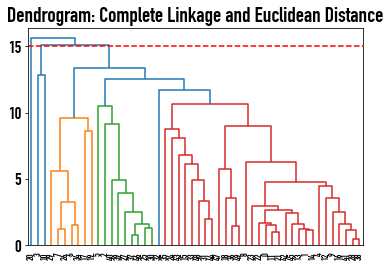

0.4440816326530612

In [24]:
fig, ax = plt.subplots()

ax.set_title("Dendrogram: Complete Linkage and Euclidean Distance")
shc.dendrogram(shc.linkage(I50_X_scaled, method='complete', metric='euclidean'), ax=ax)
ax.axhline(y=15, color='r', linestyle='--')
ax.tick_params(axis='x', which='major', labelsize=10)

plt.show()

cluster = AgglomerativeClustering(n_clusters=2, linkage='complete', affinity='euclidean')
pred = cluster.fit_predict(I50_X_scaled)

accuracy = rand_score(I50_Y, pred)
error_rate = 1 - accuracy
error_rate

### 2.1.2: Perform hierarchical clustering over I50 using Ward’s method and Euclidean distance. Report the dendrogram. Cut the dendrogram at a height that results in two distinct clusters. Calculate the error-rate.

0.4440816326530612

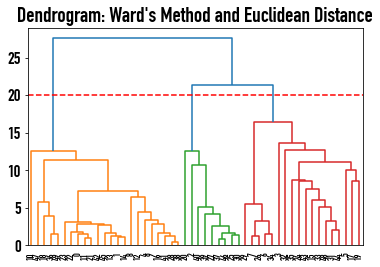

In [25]:
fig, ax = plt.subplots()

ax.set_title("Dendrogram: Ward's Method and Euclidean Distance")
shc.dendrogram(shc.linkage(I50_X_scaled, method='ward', metric='euclidean'), ax=ax)
ax.axhline(y=20, color='r', linestyle='--')
ax.tick_params(axis='x', which='major', labelsize=10)

# plt.show()

cluster = AgglomerativeClustering(n_clusters=2, linkage='ward', affinity='euclidean')
pred = cluster.fit_predict(I50_X_scaled)

accuracy = rand_score(I50_Y, pred)
error_rate = 1 - accuracy
error_rate

### 2.1.3: Perform first PCA on I and create the reduced data set, I_50_reduced, with keeping 90% of variance after 50 PCA. Perform hierarchical clustering over I_50_reduced using single linkage and Jaccard coefficient. Report the dendrogram. Cut the dendrogram at a height that results in two distinct clusters. Calculate the error-rate.

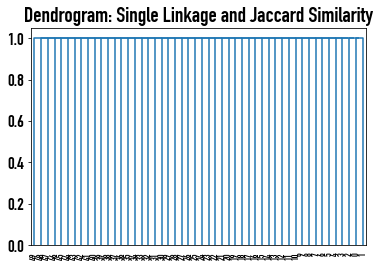

0.47020408163265304

In [26]:
pca = PCA(.90)
I_50_reduced = pd.DataFrame(pca.fit_transform(I50_X_scaled))

fig, ax = plt.subplots()
ax.set_title("Dendrogram: Single Linkage and Jaccard Similarity")
shc.dendrogram(shc.linkage(I_50_reduced, method='single', metric='jaccard'), ax=ax)
ax.axhline(y=20, color='r', linestyle='--')
ax.tick_params(axis='x', which='major', labelsize=10)

plt.show()

cluster = AgglomerativeClustering(n_clusters=2, linkage='single', affinity='jaccard')
pred = cluster.fit_predict(I50_X_scaled)

accuracy = rand_score(I50_Y, pred)
error_rate = 1 - accuracy
error_rate

### 2.1.4: Perform hierarchical clustering over I_50_reduced using average linkage and simple matching coefficient. Report the dendrogram. Cut the dendrogram at a height that results in two distinct clusters. Calculate the error-rate.

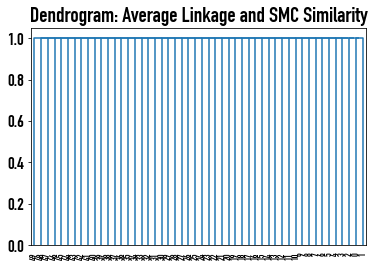

0.4114285714285715

In [38]:
pca = PCA(.90)
I_50_reduced = pd.DataFrame(pca.fit_transform(I50_X_scaled))

fig, ax = plt.subplots()
ax.set_title("Dendrogram: Average Linkage and SMC Similarity")
shc.dendrogram(shc.linkage(I_50_reduced, method='average', metric='matching'), ax=ax)
ax.axhline(y=20, color='r', linestyle='--')
ax.tick_params(axis='x', which='major', labelsize=10)

plt.show()

cluster = AgglomerativeClustering(n_clusters=2, linkage='average', affinity='matching')
pred = cluster.fit_predict(I50_X_scaled)

accuracy = rand_score(I50_Y, pred)
error_rate = 1 - accuracy
error_rate

### 2.1.5: Discuss your findings, e.g., Does clustering get better after PCA? Which proximity and linkage pair works best?

The primary take away from this problem is that agglomerative clustering can be very sensitive to initial conditions and data types, especially if using Complete Linkage, which is heavily influenced by outliers; in our case, it only merged a few remaining points at the very end of clustering, so we ended up with terribly asymmetric clusters that make accuracy on balanced data almost random.

The final attempt using Average Linkage and SMC has the best accuracy on paper, but it also yields a nonsensical dendrogram for a simple reason; both Jaccard and SMC are primarily intended for use with binary vectors, and our data is continuous. Our only if we were dead-set on using those measures would be to discretize our data as either 0s or 1s, but this clearly removes massive amounts of information that should be contained in the data, so I would say there is no satisfactory way to employ these limited coefficients to our problem at hand.

## Problem 3

### 3.1: Perform PCA on the data and make a scatter plot of PC1 and PC2 (the first two principal components). Are PC1 and PC2 linearly correlated?

No, after viewing corrplot for the data we can see they are orthogonal (as expected), with correlation between PCs at literally 0 if not for  floating point errors.

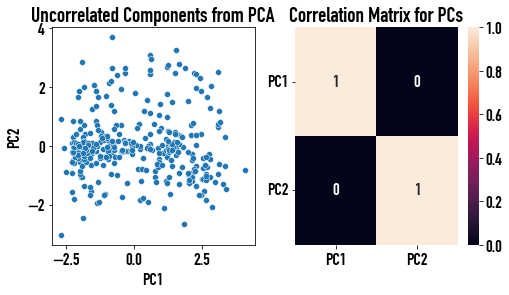

In [35]:
# Q3.1

pca_2 = PCA(n_components=2)
pca_2.fit(X)

X_new_2 = pca_2.transform(X)
X_new_2

df_pca_2 = pd.DataFrame(X_new_2)
df_pca_2.columns = ['PC1', 'PC2']

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4))

sns.scatterplot(x='PC1', y='PC2', data=df_pca_2, ax=ax1)
ax1.set_title('Uncorrelated Components from PCA')

corr = round(df_pca_2.corr(), 5)
sns.heatmap(corr, annot=True, ax=ax2)
ax2.set_title("Correlation Matrix for PCs")
ax2.set_yticklabels(df_pca_2.columns, rotation=0)

plt.show()

### 3.2: There are three methods to pick a set of principle components: (1) In the plot where the curve bends (elbow technique); (2) Add the percentage variance until total 75% is reached (70 − 90%) (3) Use the components whose variance is at least one. Report the components selected for each technique.

1. Elbow Technique
    * I selected the first 7 PCs using this method, though you could make an argument for more or less than mine. To justify my selection I will include the plot of both actual component variance and cumulative component variance for all PCs.
<br><br>
2. Add variance until total
    * With a threshold of 75%, we need to use the first 10 PCs.
<br><br>
3. Use components with variance >= 1
    * Only the first two PCs have variance greater than 1, so we only use those two.

In [29]:
# Setup for Q3.2

pca_all = PCA(n_components=X.shape[1])
pca_all.fit(X)
component_ratios = pca_all.explained_variance_ratio_
components = pca_all.explained_variance_

x = range(1, len(component_ratios) + 1)
vars = component_ratios
cum_vars = component_ratios.cumsum()

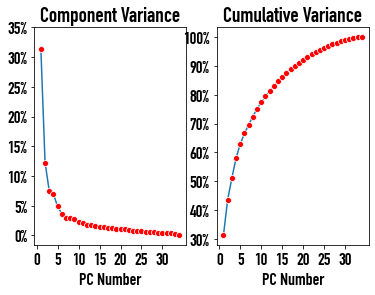

In [43]:
# Q3.2.1

fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True)
sns.lineplot(x = x, y = vars*100, marker="o", markerfacecolor="red",  ax=ax1)
sns.lineplot(x = x, y = cum_vars*100, marker="o", markerfacecolor="red", ax=ax2)

ax1.set_title('Component Variance')
ax2.set_title('Cumulative Variance')

xtick_pos = range(0, X.shape[1]+1, 5)
y1tick_range = range(0, 36, 5)
y2tick_range = range(30, 101, 10)
add_pct = lambda lst: [f"{s}%" for s in lst]

ax1.set_xticks(xtick_pos)

ax1.set_yticks(y1tick_range)
ax2.set_yticks(y2tick_range)

ax1.set_yticklabels(add_pct(y1tick_range))
ax2.set_yticklabels(add_pct(y2tick_range))

ax1.set_xlabel("PC Number")
ax2.set_xlabel("PC Number")

ax1.grid(visible=True, which="minor")
ax2.grid(visible=True, which="minor")

# ax2.set_xticks(range(1, X.shape[1]+1, 2))

plt.show()

In [31]:
# Q3.2.2
def find_components_for_threshold(threshold):
    total = 0
    inc = 1
    while total < threshold:
        total += component_ratios[inc - 1]
        inc += 1

    return inc

print(f"Number of components needed to explain 75% of the variance: {find_components_for_threshold(0.75)}")

Number of components needed to explain 75% of the variance: 10


In [32]:
# Q3.2.3

[round(x, 5) for x in components]

component_list = []
for i, component in enumerate(components):
    if component >= 1:
        component_list.append(component)

print(f"Number of components included with variance greater than 1: {len(component_list)}")

Number of components included with variance greater than 1: 2


### 3.3: Report and discuss loadings in PCA such as, using prcomp() or princomp() in R. How are principal components and original variables related?

Loadings are simply the coefficients that represent the combinations of original variables used to create the principal components. For our simple PCA, these will be linear combinations, but for something more advanced such as kernal PCA, they might describe a degree and coefficient.

I am using Python instead of R, so I will discuss the PCA object from sklearn.decomposition. This object has a few methods we will find most useful. First, to simply fit pca to the data, use the PCA.fit() method with n_components set as the number of components to keep after PCA. This returns the parameters we are looking for in the previous question; we can use it to find the variance explained by each component, the ratio of that variance, and a few other useful pieces of information. 

To actually transform our data, however, we will use a method of PCA that uses the fitted model (PCA.fit()) to apply a linear transformation to the data according to the calculated coefficients. After both fitting and transforming the data, we have n principal components remaining.

One important difference between the PCA method we learned and the PCA method from sklearn is that, as most other implementations that can be found, the sklearn uses Singular Value Decomposition (SVD) rather than Eigen Decomposition (which we learned in class). Similarly, the difference between prcomp(SVD) and princomp(Eigen) is just the method of solving. These normally yield almost identical results, but it seems that SVD is standard across implementations I have found. 

### 3.4: Perform PCA over Ionosphere data set. Keep 90% of variance after PCA and reduce Ionosphere data set and call this data ∆R. Cluster ∆R using your k-means program from previous assignment and report the total error rates for k = 2, . . . , 5 for 20 runs each. Plots are generally a good way to convey complex ideas quickly, i.e., box plots, whisker plots. Discuss your results, i.e., Does clustering get better after PCA?

According to our results here, PCA reduces SSE by a constant factor. In this case, it reduced SSE for some k by approximately 300. Therefore, we can say that clustering does get better after PCA.

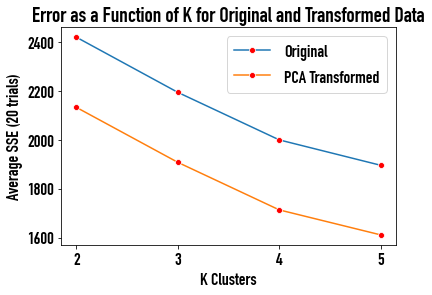

In [33]:
# Q3.4: K-Means

PCs_for_90pct_var = find_components_for_threshold(0.90)

pca_90pct = PCA(n_components=PCs_for_90pct_var)
delta_R = pd.DataFrame(pca_90pct.fit_transform(X))

def get_SSE(data, k):
    run_outputs = []
    for run in range(20):
        kmeans = KMeans(n_clusters=k).fit(data)
        run_outputs.append(kmeans.inertia_)

    return np.mean(run_outputs)

X_SSE_lst = [get_SSE(X, k) for k in range(2, 6)]
delta_R_SSE_lst = [get_SSE(delta_R, k) for k in range(2, 6)]

fig, ax = plt.subplots()
sns.lineplot(x = range(2, 6), y = X_SSE_lst, marker = "o", markerfacecolor = "red", label = "Original", ax = ax)
sns.lineplot(x = range(2, 6), y = delta_R_SSE_lst, marker = "o", markerfacecolor = "red", label = "PCA Transformed", ax = ax)
ax.set_xticks(range(2, 6))
ax.set_title("Error as a Function of K for Original and Transformed Data")
ax.set_xlabel("K Clusters")
ax.set_ylabel("Average SSE (20 trials)")

plt.show()


### Extra Credit

#### Chapter 8 Exercise 18

* Wards: As any description of HAC (of which Ward's Linkage is one subset) will tell you, this method of clustering is greedy and so will return locally optimal clusters.
* Bisecting KMeans: Similar to KMeans below, this method simply merges Hierachical Divisive Clustering with KMeans, so it retains the element of randomness in centroid initialization at every split made in the algorithm, causing it to produce locally optimal solutions.
* Standard KMeans: Because this involves randomized initial centroids, there is an element of unpredictability in the final clusters and it is only locally optimized most of the time.

#### Chapter 8 Exercise 30

* Interpreting the results of KMeans (or any clustering) requires an understanding of the input data; if we are feeding in only a matrix of terms (above a certain threshold of frequency) and how often they were used, any clustering on the data will simply group terms that occur similar amounts. Think about it; with only 1 dimension to go on (how often a term occurs), we are basically just placing terms on a number line and drawing k circles around the terms that are close together. As long as the proximity metric used stays the same, the only difference between this and determing clusters based on most popular clusters would be the number of clusters formed. 

* You could define each cluster as a class and group documents by which class most of their terms fall into, so essentially performing clustering for individual terms and documents separately.